In [1]:
import data_retrieval_utils as dru
import fsspec
from fv3net.diagnostics.prognostic_run.computed_diagnostics import ComputedDiagnosticsList
import fv3viz
from matplotlib.colors import LogNorm
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from run_dict import RUN_DICT, BASELINE_ALG, ML_ONLY_ALG, OCSVM_DEFAULT
from scipy.interpolate import interp1d
import xarray as xr

/home/claytons/miniconda3/envs/fv3net/lib/python3.8/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [6]:
run_names = {
    BASELINE_ALG: r"Baseline",
    ML_ONLY_ALG: r"ML-corrected $g_{\mathrm{Tq}}$",
    OCSVM_DEFAULT: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}$",
}
runs = {name: RUN_DICT[name] for name in run_names}

In [17]:
diags_complete = dru.get_diags_complete_downloaded(runs)


In [35]:
field_value = "total_precip_to_surface_deep_tropical_meridional_mean_value"
field_bias = "total_precip_to_surface_deep_tropical_meridional_mean_bias"

precip = xr.concat(
    [diags_complete[name].assign_coords(dru.COMMON_COORDS)[field_value]
     for name in run_names],
    dim=pd.Index(run_names.values(), name="run")
)
verif = diags_complete[BASELINE_ALG][field_value] - diags_complete[BASELINE_ALG][field_bias]
precip = xr.concat([precip, verif.assign_coords(run='Verification')], 'run')

Text(0.5, 1.0, 'Verification')

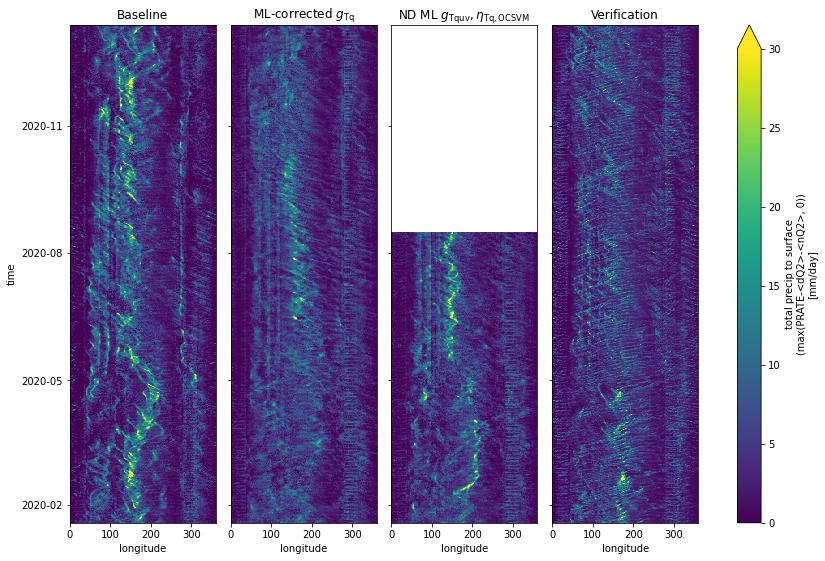

In [37]:
fg = precip.plot(x='longitude', col='run', vmin=0, vmax=30)
fg.fig.set_size_inches((12, 10))
fg.axes[0][0].set_ylabel("time")
for i, name in enumerate(run_names.values()):
    fg.axes[0][i].set_title(name)
fg.axes[0][3].set_title("Verification")